In [39]:
import os
import glob
import numpy as np
from iwc2tb.GMI.GMI import GMI
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
plt.rcParams.update({'font.size': 16})

In [40]:
def get_all_files(inpath_aro):
    matfiles1 = glob.glob(os.path.join(inpath_aro, "2009_00*.mat"))
    matfiles2 = glob.glob(os.path.join(inpath_aro, "2009_01*.mat"))
    matfiles3 = glob.glob(os.path.join(inpath_aro, "2009_02*.mat"))
    #matfiles = matfiles1
    matfiles = matfiles1 + matfiles2 + matfiles3
    gmi                 = GMI(matfiles)
    ta, iwp, stype, ta_cksy             = gmi.ta_noise, gmi.iwp, gmi.stype, gmi.ta_csky_noise
    ta                  = swap_gmi_183(ta)
    return ta, iwp, stype

In [41]:
def swap_gmi_183(ta1):
    
        temp = np.zeros(ta1.shape)
        temp[:,  1] = ta1[:, 1]
        temp[:,  0] = ta1[:, 0]
        temp[:,  2] = ta1[:, 3]
        temp[:,  3] = ta1[:, 2]
        ta1 = temp.copy()
        
        return ta1 

In [42]:
def density_plot(x, y):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    return x, y, z



In [43]:
inpath_aro   =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/') 
inpath_tro   =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/lpa_pr_1') 

# GMI frquencies
freq     = ["166.5V", "166.5H", "183+-3", "183+-7"]



In [44]:
ta_aro, iwp_aro, stype_aro, ta_csky = get_all_files(inpath_aro)

FileNotFoundError: No such file: '/home/inderpreet/data/temp/lat_grid.xml'

In [ ]:
ta_tro, iwp_tro, stype_tro, ta_csky = get_all_files(inpath_tro)

In [21]:
cmask_aro = iwp_aro > 1
cmask_tro = iwp_tro > 1



In [22]:
x1, y1, z1 = density_plot(ta_aro[cmask_aro, 0], ta_aro[cmask_aro, 0] - ta_aro[cmask_aro, 1])
x2, y2, z2 = density_plot(ta_tro[cmask_tro, 0], ta_tro[cmask_tro, 0] - ta_tro[cmask_tro, 1])

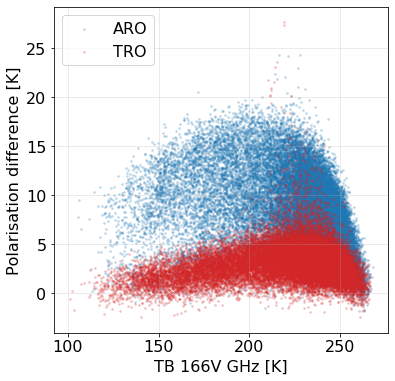

In [38]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1, 1, figsize = [6, 6])

#ax.scatter(x2, y2, c=z2, s=3, label = "TRO", cmap = cm.Reds)
#ax.scatter(x1, y1, c=z1, s=3, label = "ARO", cmap = cm.Blues)


ax.scatter(ta_aro[cmask_aro, 0], ta_aro[cmask_aro, 0] - ta_aro[cmask_aro, 1], label = "ARO", s = 3, alpha = 0.2, c = "tab:blue")
ax.scatter(ta_tro[cmask_tro, 0], ta_tro[cmask_tro, 0] - ta_tro[cmask_tro, 1], label = "TRO", s = 3, alpha = 0.2, c = "tab:red")

ax.set_xlabel("TB 166V GHz [K]")
ax.set_ylabel("Polarisation difference [K]")
ax.legend()
ax.grid("on", alpha = 0.3)
fig.savefig("PD_aro_tro.png", bbox_inches = "tight")

In [ ]:
mask_a = stype_aro == 2
mask_t = stype_tro == 2
mask

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = [8, 8])


